In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import helper_funcs

from scipy.stats import pearsonr as pearsonr


In [2]:
d0 = pd.read_csv("/Users/don/Documents/my_vignettes/data/test_dme_data.csv").fillna(0)

# Load DA data
d1 = pd.read_csv("/Users/don/Documents/my_vignettes/data/test_data_dme_da_metabs.csv")

# Only dz is used: means and SDs of raw abundance data
(d_log, dlm, dz, dz2, dz3) = helper_funcs.load_datasets(d0)

n_trt = 6; n_ctrl = 6

dz["ctrl_CoV"] = dz.apply(lambda row: float(row["ctrl_sd"])/float(row["ctrl_mean"]), axis=1)
dz["ctrl_sem"] = dz.apply(lambda row: float(row["ctrl_sd"])/np.sqrt(6), axis=1)

dz["trtmt_CoV"] = dz.apply(lambda row: float(row["trtmt_sd"])/float(row["trtmt_mean"]), axis=1)
dz["trtmt_sem"] = dz.apply(lambda row: float(row["trtmt_sd"])/np.sqrt(6), axis=1)

dz = dz.reset_index()
dz = dz.rename(columns={"index":"cpd_name"})
d1 = d1.rename(columns={"Sample":"cpd_name"})

# Merge d1 and dz
dz = pd.merge(d1, dz, on="cpd_name")




/Users/don/Documents/my_vignettes/vsn/helper_funcs.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  d_log[new_colname] = np.log2(d_t[cnm])


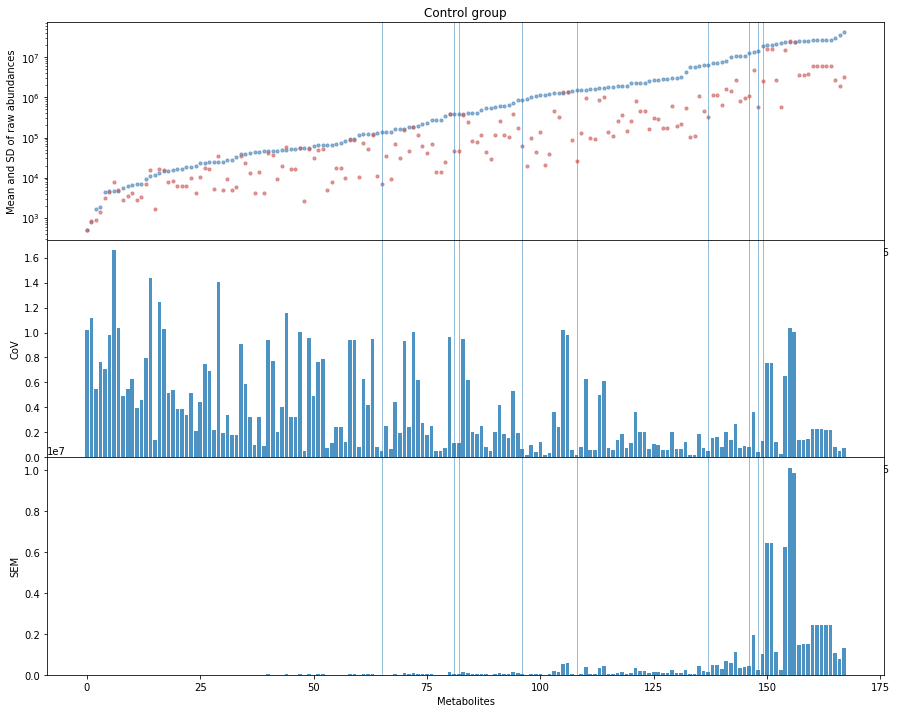

In [23]:
dz = dz.sort_values(by="ctrl_mean")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
marker_size = 10

ax1.scatter(np.arange(len(dz)), np.array(dz["ctrl_mean"]), alpha=0.6, c="steelblue", s=marker_size)
ax1.scatter(np.arange(len(dz)), np.array(dz["ctrl_sd"]), alpha=0.6, c="indianred", s=marker_size)
ax1.set_yscale('log')

ax2.bar(np.arange(len(dz)), np.array(dz["ctrl_CoV"]), width=0.8, alpha=0.8)

ax3.bar(np.arange(len(dz)), np.array(dz["ctrl_sem"]), width=0.8, alpha=0.8)

idx = 0
for index, row in dz.iterrows():
    if float(row["adj_p_val"]) < 0.05:
        ax1.axvline(x=idx, lw=0.8, alpha=0.6)
        ax2.axvline(x=idx, lw=0.8, alpha=0.6)
        ax3.axvline(x=idx, lw=0.8, alpha=0.6)
    idx += 1
    

# Ax labels
ax1.set_ylabel("Mean and SD of raw abundances")
ax2.set_ylabel("CoV")
ax3.set_ylabel("SEM")
ax3.set_xlabel("Metabolites")

ax1.set_title("Control group")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("meansd-cov-ctrl.png", bbox_inches="tight")
plt.show()

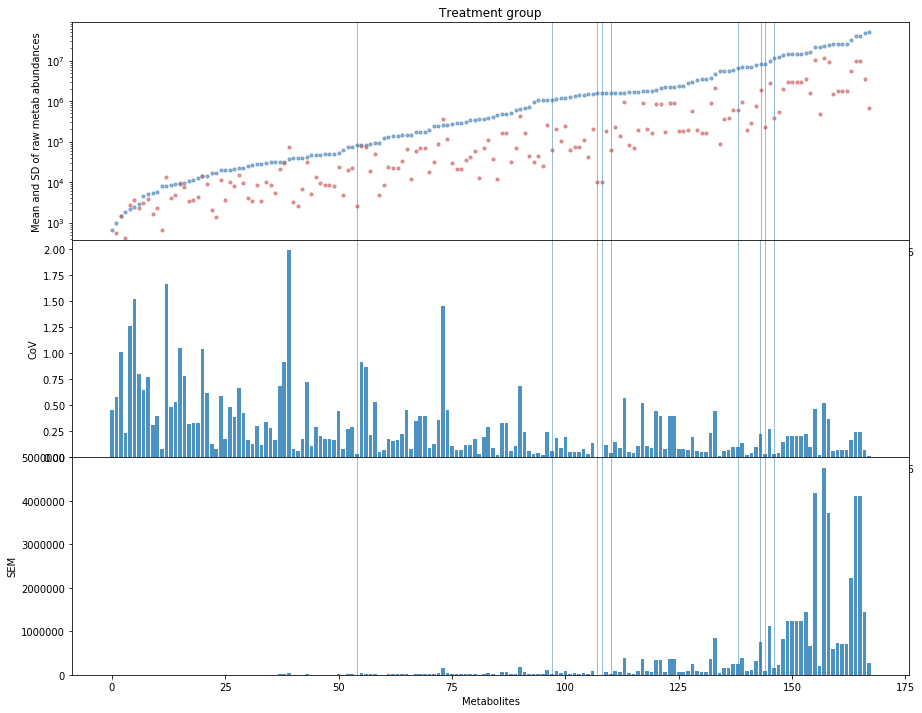

In [24]:
dz = dz.sort_values(by="trtmt_mean")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
marker_size = 10

ax1.scatter(np.arange(len(dz)), np.array(dz["trtmt_mean"]), alpha=0.6, c="steelblue", s=marker_size)
ax1.scatter(np.arange(len(dz)), np.array(dz["trtmt_sd"]), alpha=0.6, c="indianred", s=marker_size)
ax1.set_yscale('log')

ax2.bar(np.arange(len(dz)), np.array(dz["trtmt_CoV"]), width=0.8, alpha=0.8)

ax3.bar(np.arange(len(dz)), np.array(dz["trtmt_sem"]), width=0.8, alpha=0.8)

idx = 0
for index, row in dz.iterrows():
    if float(row["adj_p_val"]) < 0.05:
        ax1.axvline(x=idx, lw=0.8, alpha=0.6)
        ax2.axvline(x=idx, lw=0.8, alpha=0.6)
        ax3.axvline(x=idx, lw=0.8, alpha=0.6)
    idx += 1

# Ax labels
ax1.set_ylabel("Mean and SD of raw metab abundances")
ax2.set_ylabel("CoV")
ax3.set_ylabel("SEM")
ax3.set_xlabel("Metabolites")

ax1.set_title("Treatment group")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("meansd-cov-trtmt.png", bbox_inches="tight")
plt.show()

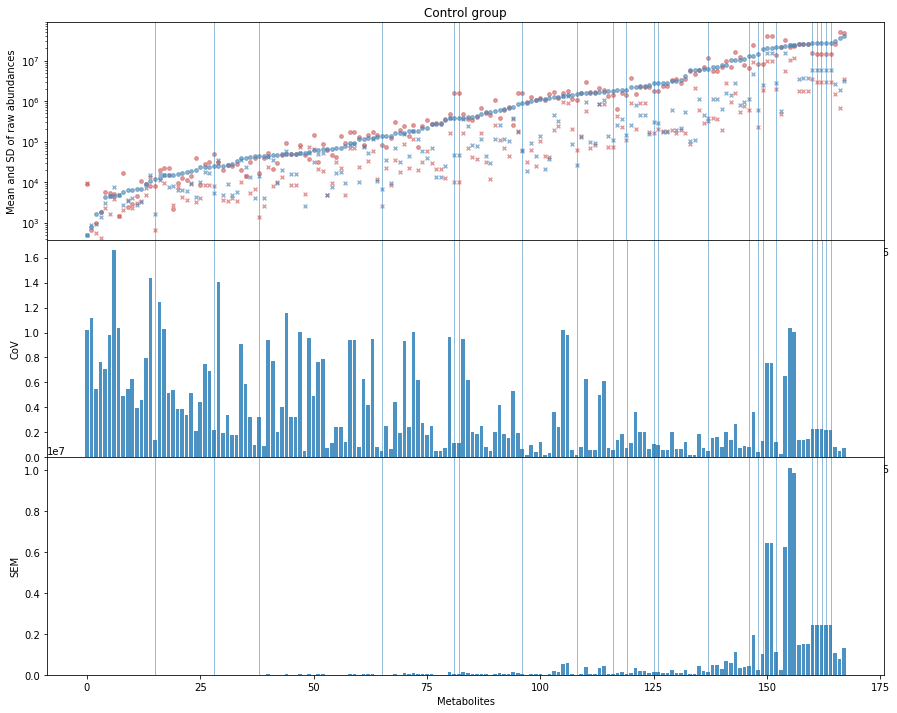

In [22]:
dz = dz.sort_values(by="ctrl_mean")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
marker_size = 14

ax1.scatter(np.arange(len(dz)), np.array(dz["trtmt_mean"]), alpha=0.6, c="indianred", s=marker_size, marker="o")
ax1.scatter(np.arange(len(dz)), np.array(dz["trtmt_sd"]), alpha=0.6, c="indianred", s=marker_size, marker="x")
# ctrl
ax1.scatter(np.arange(len(dz)), np.array(dz["ctrl_mean"]), alpha=0.6, c="steelblue", s=marker_size, marker="o")
ax1.scatter(np.arange(len(dz)), np.array(dz["ctrl_sd"]), alpha=0.6, c="steelblue", s=marker_size, marker="x")
ax1.set_yscale('log')

ax2.bar(np.arange(len(dz)), np.array(dz["ctrl_CoV"]), width=0.8, alpha=0.8)

ax3.bar(np.arange(len(dz)), np.array(dz["ctrl_sem"]), width=0.8, alpha=0.8)

idx = 0
for index, row in dz.iterrows():
    if float(row["adj_p_val"]) < 0.3:
        ax1.axvline(x=idx, lw=0.8, alpha=0.6)
        ax2.axvline(x=idx, lw=0.8, alpha=0.6)
        ax3.axvline(x=idx, lw=0.8, alpha=0.6)
    idx += 1
    

# Ax labels
ax1.set_ylabel("Mean and SD of raw abundances")
ax2.set_ylabel("CoV")
ax3.set_ylabel("SEM")
ax3.set_xlabel("Metabolites")

ax1.set_title("Control group")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("meansd-cov-both.pdf", bbox_inches="tight")
plt.show()